In [2]:
import tensorflow as tf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Regression with Tensorflow:

In [7]:
x_data = np.linspace(0.0,10.0,1000000)
print(x_data)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


In [8]:
noise = np.random.randn(len(x_data))
noise

array([ 1.22471625,  0.77385964, -0.33749423, ...,  0.64655553,
       -0.72808673,  0.00336476])

In [9]:
y_true = (0.5*x_data) + 5 + noise
y_true

array([ 6.22471625,  5.77386464,  4.66251577, ..., 10.64654553,
        9.27190827, 10.00336476])

In [10]:
x_df = pd.DataFrame(data=x_data, columns=["X_Data"])
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [11]:
x_df.head()

,X_Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
y_df.head()

,Y
0,6.224716
1,5.773865
2,4.662516
3,4.942599
4,3.625173


In [13]:
my_data = pd.concat([x_df, y_df], axis=1)

In [14]:
my_data.head()

,X_Data,Y
0,0.00000,6.224716
1,0.00001,5.773865
2,0.00002,4.662516
3,0.00003,4.942599
4,0.00004,3.625173


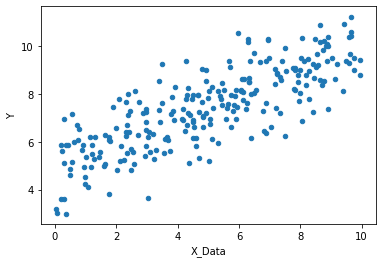

In [15]:
my_data.sample(n=250).plot(kind="scatter", x="X_Data", y="Y")
plt.show()

In [16]:
batch_size = 8

In [17]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [18]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

## Model

In [20]:
y_model = m * xph + b

## Cost function

In [23]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [24]:
#Optimizing
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [25]:
#Init variables
init = tf.global_variables_initializer()

## Session

In [29]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size) #random index
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [31]:
print("weight =", model_m, "\nbias =", model_b)

weight = 0.5422852 
bias = 4.98871


## Plotting best fit line

In [33]:
y_hat = x_data*model_m + model_b

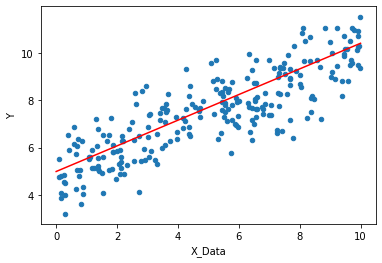

In [59]:
my_data.sample(n=250).plot(kind="scatter", x="X_Data", y="Y")
plt.plot(x_data, y_hat, 'r')
plt.show()

# Estimator API:

In [36]:
feat_cols = [tf.feature_column.numeric_column("x", shape=(1))]

In [37]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\msi1\\AppData\\Local\\Temp\\tmpkaausx2b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014918286A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## train, test, split

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=0)

## Input function

In [50]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=True)

In [51]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)

In [52]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)

## Training

In [55]:
estimator.train(input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msi1\AppData\Local\Temp\tmpkaausx2b\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\msi1\AppData\Local\Temp\tmpkaausx2b\model.ckpt.
INFO:tensorflow:loss = 5.6386228, step = 1001
INFO:tensorflow:global_step/sec: 686.479
INFO:tensorflow:loss = 4.982976, step = 1101 (0.146 sec)
INFO:tensorflow:global_step/sec: 1091.03
INFO:tensorflow:loss = 2.442477, step = 1201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1151.67
INFO:tensorflow:loss = 4.173249, step = 1301 (0.087 sec)
INFO:tensorflow:global_step/sec: 1048.79
INFO:tensorflow:loss = 0.40809047, step = 1401 (0.095 sec)
INFO:tensorflow:global_step/sec: 980.922
INFO:tensorflow:loss = 4.4278574, step = 1501 (0.102 sec)
INFO:tensorflow